<a href="https://colab.research.google.com/github/JeelDhamsaniya/CVDL-practicals/blob/main/CVDL4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

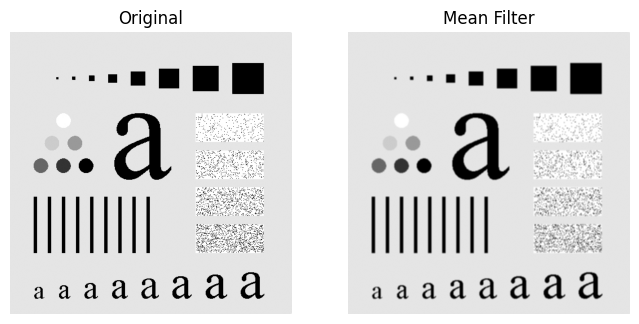

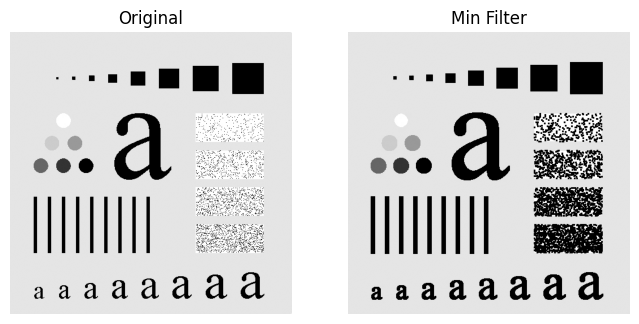

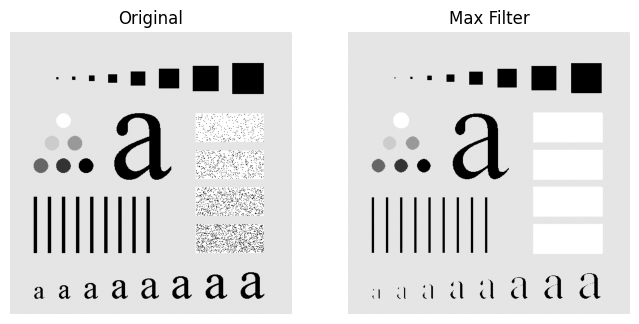

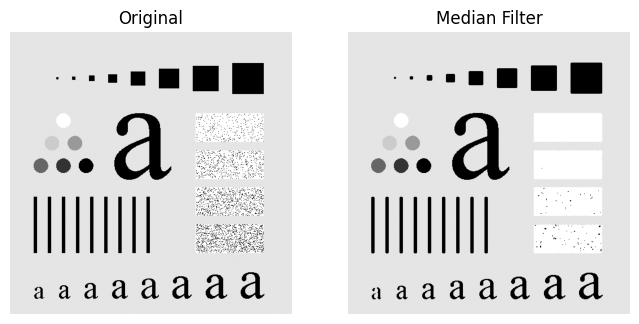

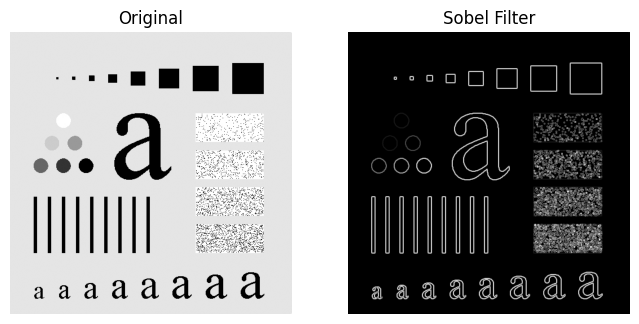

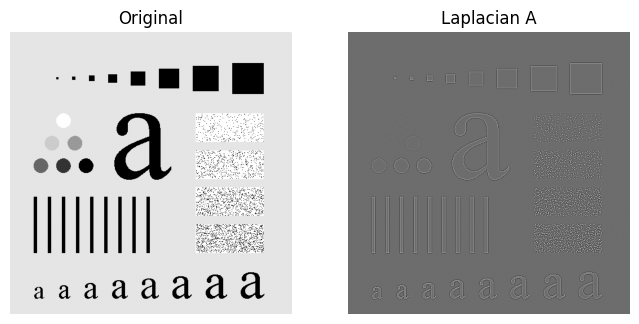

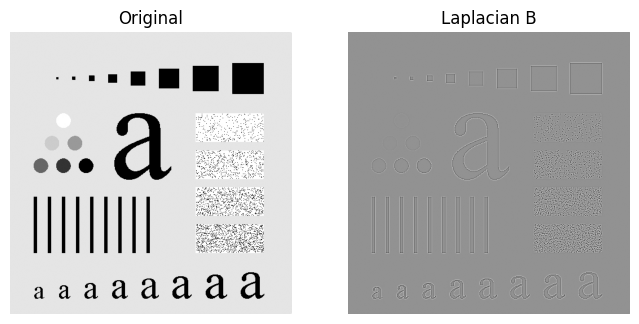

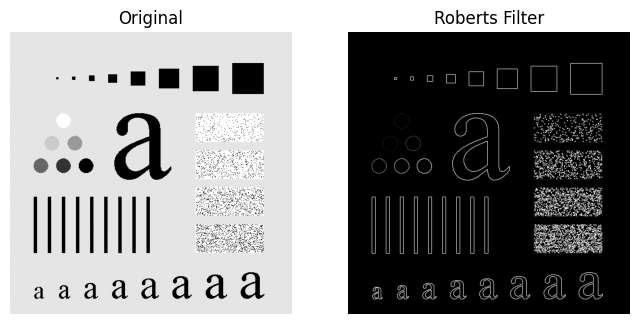

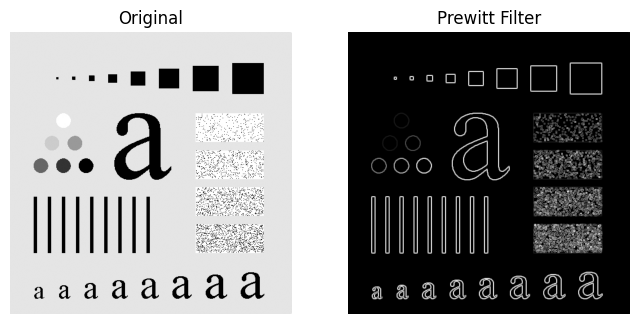

In [ ]:
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

def load_image(path):
    return np.array(Image.open(path).convert("L"), dtype=np.float32)

# Generic convolution
def apply_filter(img, kernel):
    kh, kw = kernel.shape
    pad_h, pad_w = kh // 2, kw // 2
    padded = np.pad(img, ((pad_h, pad_h), (pad_w, pad_w)), mode='reflect')

    out = np.zeros_like(img, dtype=np.float32)
    for i in range(img.shape[0]):
        for j in range(img.shape[1]):
            out[i, j] = np.sum(
                padded[i:i+kh, j:j+kw] * kernel
            )
    return out

# Smoothening Filters
def mean_filter(img, k=3):
    kernel = np.ones((k, k), dtype=np.float32) / (k*k)
    return apply_filter(img, kernel)

def min_filter(img, k=3):
    k2 = k // 2
    out = np.zeros((img.shape[0]-2*k2, img.shape[1]-2*k2))
    for i in range(k2, img.shape[0]-k2):
        for j in range(k2, img.shape[1]-k2):
            out[i-k2, j-k2] = np.min(img[i-k2:i+k2+1, j-k2:j+k2+1])
    return out

def max_filter(img, k=3):
    k2 = k // 2
    out = np.zeros((img.shape[0]-2*k2, img.shape[1]-2*k2))
    for i in range(k2, img.shape[0]-k2):
        for j in range(k2, img.shape[1]-k2):
            out[i-k2, j-k2] = np.max(img[i-k2:i+k2+1, j-k2:j+k2+1])
    return out

def median_filter(img, k=3):
    k2 = k // 2
    out = np.zeros((img.shape[0]-2*k2, img.shape[1]-2*k2))
    for i in range(k2, img.shape[0]-k2):
        for j in range(k2, img.shape[1]-k2):
            out[i-k2, j-k2] = np.median(img[i-k2:i+k2+1, j-k2:j+k2+1])
    return out

# Sobel Filter
def sobel_filter(img):
    gx = apply_filter(img, np.array([[1, 0, -1],
                                     [2, 0, -2],
                                     [1, 0, -1]], dtype=np.float32))
    gy = apply_filter(img, np.array([[1, 2, 1],
                                     [0, 0, 0],
                                     [-1, -2, -1]], dtype=np.float32))
    return np.sqrt(gx**2 + gy**2)

# Laplacian Filter
def laplacian_filter(img, variant="a"):
    if variant == "a":
        kernel = np.array([[1, 1, 1],
                           [1, -8, 1],
                           [1, 1, 1]], dtype=np.float32)
    else:
        kernel = np.array([[-1, -1, -1],
                           [-1,  8, -1],
                           [-1, -1, -1]], dtype=np.float32)
    return apply_filter(img, kernel)

# Roberts Filter
def roberts_filter(img):
    gx = apply_filter(img, np.array([[1, 0],
                                     [0, -1]], dtype=np.float32))
    gy = apply_filter(img, np.array([[0, 1],
                                     [-1, 0]], dtype=np.float32))
    return np.sqrt(gx**2 + gy**2)

# Prewitt Filter
def prewitt_filter(img):
    gx = apply_filter(img, np.array([[-1, 0, 1],
                                     [-1, 0, 1],
                                     [-1, 0, 1]], dtype=np.float32))
    gy = apply_filter(img, np.array([[-1, -1, -1],
                                     [ 0,  0,  0],
                                     [ 1,  1,  1]], dtype=np.float32))
    return np.sqrt(gx**2 + gy**2)

def show_images(original, processed, title):
    plt.figure(figsize=(8,4))
    plt.subplot(1,2,1); plt.imshow(original, cmap="gray"); plt.title("Original"); plt.axis("off")
    plt.subplot(1,2,2); plt.imshow(processed, cmap="gray"); plt.title(title); plt.axis("off")
    plt.show()

img = load_image("/content/sample_data/abcl.jpg")

show_images(img, mean_filter(img), "Mean Filter")
show_images(img, min_filter(img), "Min Filter")
show_images(img, max_filter(img), "Max Filter")
show_images(img, median_filter(img), "Median Filter")

show_images(img, sobel_filter(img), "Sobel Filter")
show_images(img, laplacian_filter(img, "a"), "Laplacian A")
show_images(img, laplacian_filter(img, "b"), "Laplacian B")
show_images(img, roberts_filter(img), "Roberts Filter")
show_images(img, prewitt_filter(img), "Prewitt Filter")